# Permanent Residence

Fonte: https://open.canada.ca/data/en/dataset/f7e5498e-0ad8-4417-85c9-9b8aff9b9eda

In [1]:
import numpy as np
import pandas as pd

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [2]:
df = pd.read_excel('data/PermResid.xls')
df

,Country,2015,2016,2017,2018,2019,2020
0,Afghanistan,2630,2650,3455,3560,3900,825
1,Albania,565,510,645,650,625,150
2,Algeria,2830,2820,2635,3225,3705,980
3,Andorra,0,0,0,0,0,0
4,Angola,30,30,45,35,65,20
...,...,...,...,...,...,...,...
195,Zambia,55,55,85,70,75,30
196,Zimbabwe,230,280,420,595,565,165
197,Other Countries,10,10,10,15,15,10
198,Country not stated,0,0,0,0,0,0


In [3]:
df.dtypes

Country    object
2015        int64
2016        int64
2017        int64
2018        int64
2019        int64
2020        int64
dtype: object

In [4]:
df['Total_Acumulado'] = df.sum(axis=1)
df

,Country,2015,2016,2017,2018,2019,2020,Total_Acumulado
0,Afghanistan,2630,2650,3455,3560,3900,825,17020
1,Albania,565,510,645,650,625,150,3145
2,Algeria,2830,2820,2635,3225,3705,980,16195
3,Andorra,0,0,0,0,0,0,0
4,Angola,30,30,45,35,65,20,225
...,...,...,...,...,...,...,...,...
195,Zambia,55,55,85,70,75,30,370
196,Zimbabwe,230,280,420,595,565,165,2255
197,Other Countries,10,10,10,15,15,10,70
198,Country not stated,0,0,0,0,0,0,0


In [5]:
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [6]:
# Set the country name as index
df.set_index('Country', inplace=True)

# tip: The opposite of set is reset. So to reset the index, we can use 
#df.reset_index()

In [7]:
df.shape

(200, 7)

In [8]:
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [9]:
# Preparando a lista de anos
years = ['2015', '2016', '2017', '2018', '2019']
years

['2015', '2016', '2017', '2018', '2019']

In [10]:
print(df.loc['Brazil'])

2015                1730
2016                1730
2017                2760
2018                3950
2019                5290
2020                2255
Total_Acumulado    17715
Name: Brazil, dtype: int64


In [11]:
print(df.loc['Brazil', '2020'])

2255


In [12]:
brazil = df.loc['Brazil', years]
brazil

2015    1730
2016    1730
2017    2760
2018    3950
2019    5290
Name: Brazil, dtype: int64

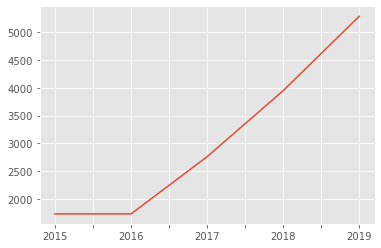

In [13]:
brazil.plot()

In [14]:
total = df.loc['Total', years] # De todos os países
total

2015    271835
2016    296370
2017    286510
2018    321055
2019    341175
Name: Total, dtype: int64

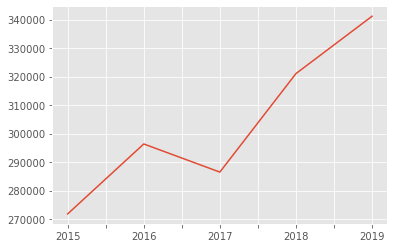

In [15]:
total.plot()

In [16]:
df_BT = df.loc[['Brazil', 'Total'], years]
df_BT.head()

,2015,2016,2017,2018,2019
Country,,,,,
Brazil,1730,1730,2760,3950,5290
Total,271835,296370,286510,321055,341175


In [17]:
df_BT = df_BT.transpose()
df_BT.head()

Country,Brazil,Total
2015,1730,271835
2016,1730,296370
2017,2760,286510
2018,3950,321055
2019,5290,341175


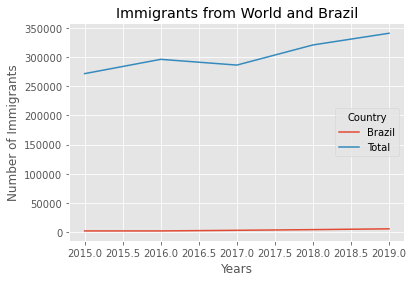

In [18]:
df_BT.index = df_BT.index.map(int) # let's change the index values of df_BT to type integer for plotting
df_BT.plot(kind='line')

plt.title('Immigrants from World and Brazil')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [19]:
update_df = df.drop('Total') 
update_df

,2015,2016,2017,2018,2019,2020,Total_Acumulado
Country,,,,,,,
Afghanistan,2630,2650,3455,3560,3900,825,17020
Albania,565,510,645,650,625,150,3145
Algeria,2830,2820,2635,3225,3705,980,16195
Andorra,0,0,0,0,0,0,0
Angola,30,30,45,35,65,20,225
...,...,...,...,...,...,...,...
Yemen,205,160,250,550,665,260,2090
Zambia,55,55,85,70,75,30,370
Zimbabwe,230,280,420,595,565,165,2255


Country  India  Philippines  China, People's Republic of  Syria  Pakistan
2015     39340        50840                        19460   9850     11295
2016     39705        41850                        26785  35000     11350
2017     51590        40880                        30250  12060      7655
2018     69980        35050                        29710  12045      9490
2019     85590        27820                        30245  10120     10795


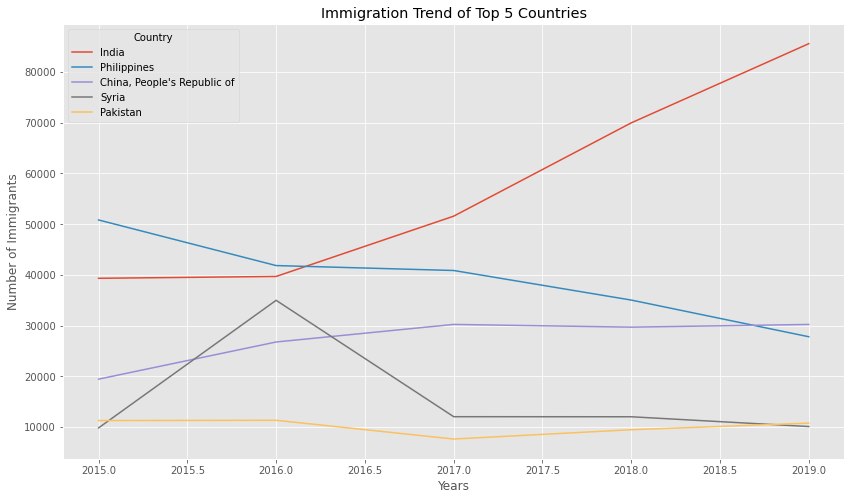

In [20]:
update_df.sort_values(by='Total_Acumulado', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = update_df.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose()

print(df_top5)

# Plot the dataframe. To make the plot more readeable, we will change the size 
#using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

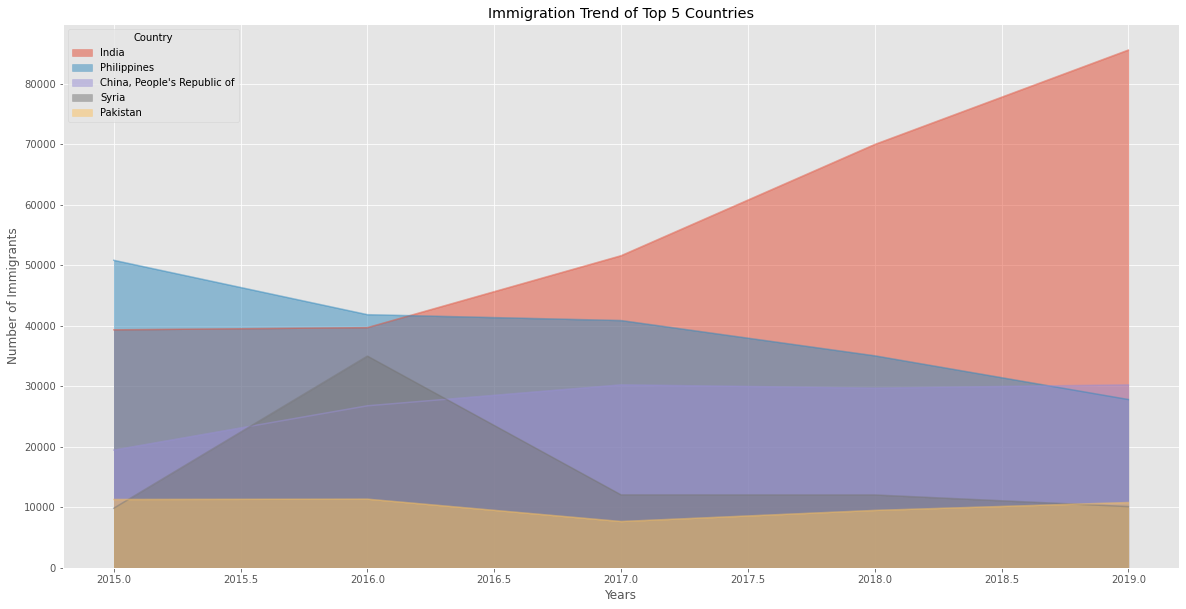

In [21]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

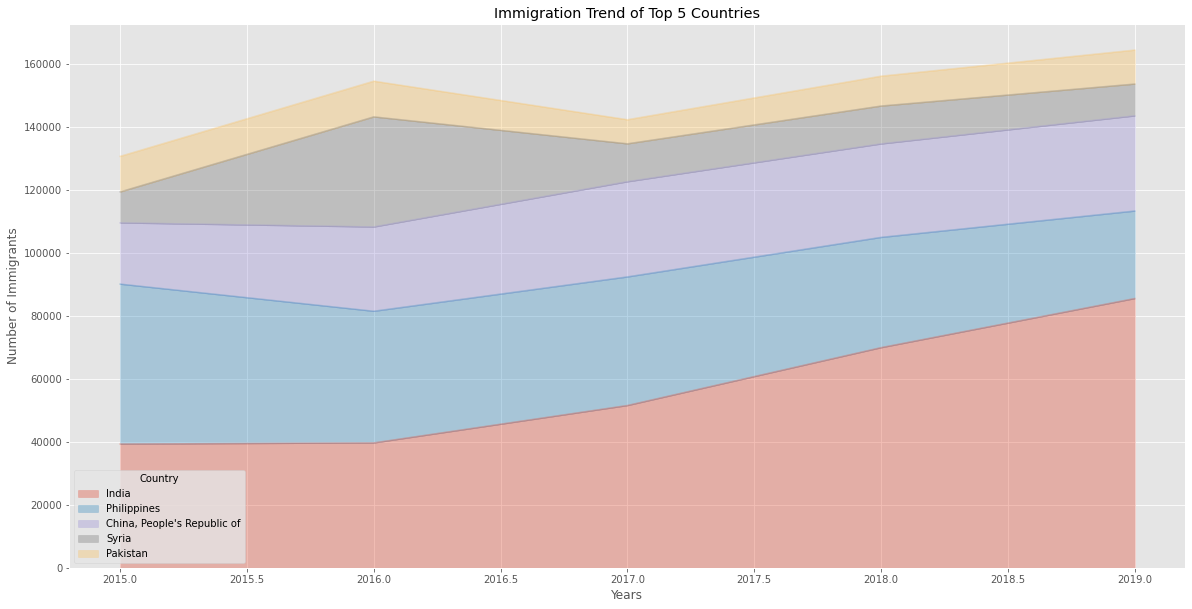

In [22]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [23]:
df.loc[df.Total_Acumulado > 10000, years]

,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,2630,2650,3455,3560,3900
Algeria,2830,2820,2635,3225,3705
Australia,1470,1705,1865,2175,2140
Bangladesh,3305,3230,3190,3205,3395
Brazil,1730,1730,2760,3950,5290
"Cameroon, Federal Republic of",2030,2100,2285,2275,2950
"China, People's Republic of",19460,26785,30250,29710,30245
Colombia,2180,2440,2235,2270,2275
"Congo, Democratic Republic of the",1675,2480,2355,2385,2295


In [24]:
df.loc[df.Total_Acumulado > 30000, ['2015', '2016', '2017', '2018', '2019', 'Total_Acumulado']]

,2015,2016,2017,2018,2019,Total_Acumulado
Country,,,,,,
"China, People's Republic of",19460,26785,30250,29710,30245,146600
France,5850,6390,6625,6175,4960,32240
India,39340,39705,51590,69980,85590,312815
Iran,11640,6475,4730,5510,6055,36515
Nigeria,4090,4415,5445,10920,12600,40820
Pakistan,11295,11350,7655,9490,10795,53890
Philippines,50840,41850,40880,35050,27820,203370
Syria,9850,35000,12060,12045,10120,81220
United States of America,7655,8485,9140,10905,10780,50835


In [25]:
df.loc[df.Total_Acumulado > 100000, ['2015', '2016', '2017', '2018', '2019', 'Total_Acumulado']]

,2015,2016,2017,2018,2019,Total_Acumulado
Country,,,,,,
"China, People's Republic of",19460,26785,30250,29710,30245,146600
India,39340,39705,51590,69980,85590,312815
Philippines,50840,41850,40880,35050,27820,203370
Total,271835,296370,286510,321055,341175,1620365


In [26]:
update_df.sort_values(by='Total_Acumulado', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top15 = update_df.head(15)

# transpose the dataframe
df_top15 = df_top15[years]

print(df_top15)

                                          2015   2016   2017   2018   2019
Country                                                                   
India                                    39340  39705  51590  69980  85590
Philippines                              50840  41850  40880  35050  27820
China, People's Republic of              19460  26785  30250  29710  30245
Syria                                     9850  35000  12060  12045  10120
Pakistan                                 11295  11350   7655   9490  10795
United States of America                  7655   8485   9140  10905  10780
Nigeria                                   4090   4415   5445  10920  12600
Iran                                     11640   6475   4730   5510   6055
France                                    5850   6390   6625   6175   4960
United Kingdom and Overseas Territories   5360   5805   5310   5660   5635
Eritrea                                   2210   4655   4690   5695   7030
Korea, Republic of       

In [27]:
# sort dataframe on 'Total' column (descending)
update_df.sort_values(by='Total_Acumulado', ascending=True, inplace=True)

# get top 15 countries
df_top15 = update_df['Total_Acumulado'].tail(15)
df_top15

Country
Mexico                                      17875
Jamaica                                     19780
Iraq                                        21705
Korea, Republic of                          24840
Eritrea                                     25615
United Kingdom and Overseas Territories     29910
France                                      32240
Iran                                        36515
Nigeria                                     40820
United States of America                    50835
Pakistan                                    53890
Syria                                       81220
China, People's Republic of                146600
Philippines                                203370
India                                      312815
Name: Total_Acumulado, dtype: int64

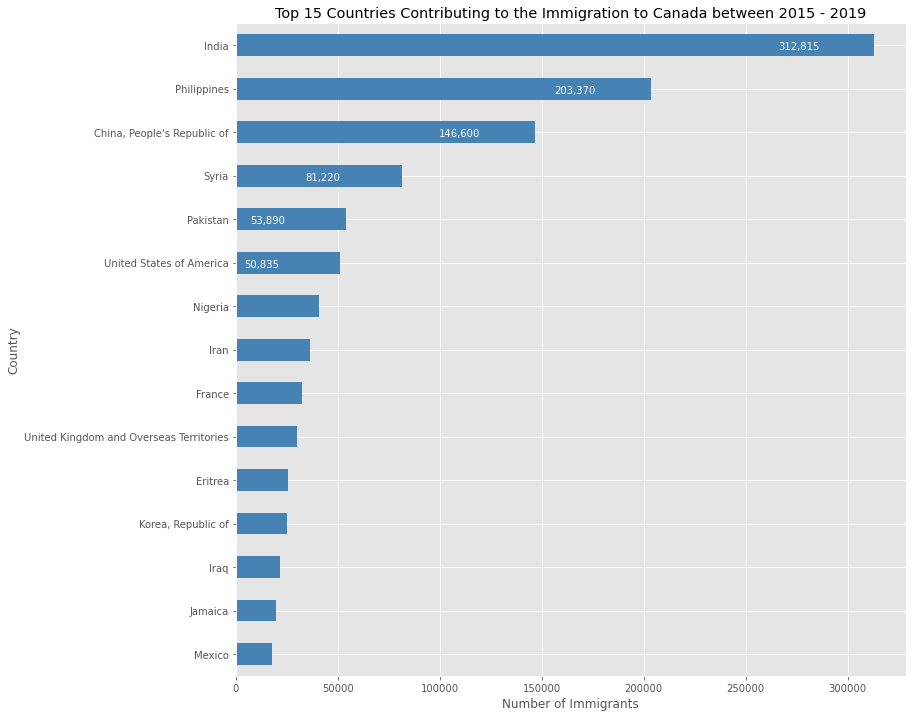

In [28]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 2015 - 2019')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

In [29]:
df_Brazil = df.loc[['Brazil'], years]
df_Brazil.head()

,2015,2016,2017,2018,2019
Country,,,,,
Brazil,1730,1730,2760,3950,5290


In [30]:
df_Brazil = df_Brazil.transpose()
df_Brazil.head()

Country,Brazil
2015,1730
2016,1730
2017,2760
2018,3950
2019,5290


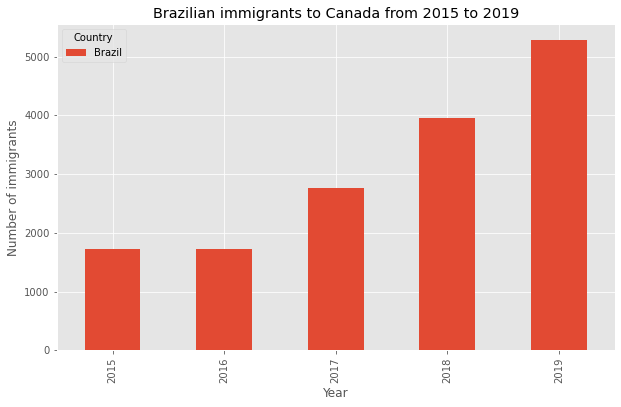

In [31]:
df_Brazil.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Brazilian immigrants to Canada from 2015 to 2019') # add title to the plot

plt.show()